In [35]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
with open('SHAP_values_EA.pkl', 'rb') as f:
    values_ea = pickle.load(f)

In [5]:
with open('SHAP_values_Polish.pkl', 'rb') as f:
    values_polish = pickle.load(f)

In [10]:
values_ea[1].shape

(10, 64, 64, 1)

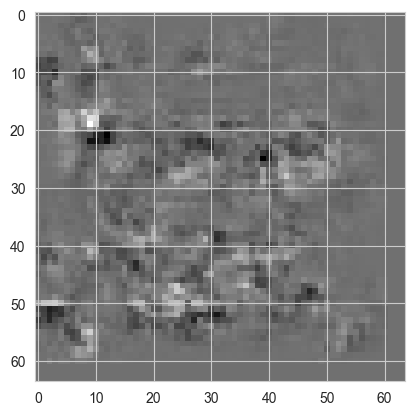

In [65]:
plt.imshow(np.mean(values_polish[1], axis=0), cmap='binary_r')

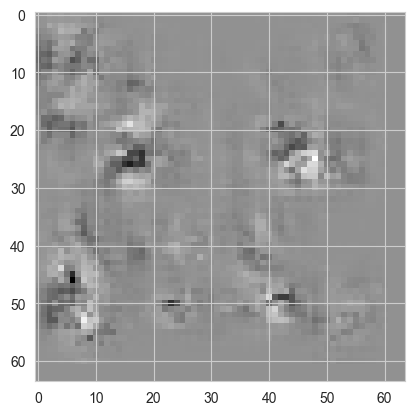

In [66]:
plt.imshow(np.mean(values_ea[1], axis=0), cmap='binary_r')

In [104]:
# find location where pixel values are above the mean

mean_ea = np.abs(values_ea[1].flatten()).mean()
std_ea = np.abs(values_ea[1].flatten()).std()
# mean_ea = 0.01
x_all, y_all = [], []
for i in range(values_ea[1].shape[0]):
    x_above, y_above = np.where(values_ea[1][i, :, :, 0] > mean_ea + 2*std_ea)
    x_all.append(x_above)
    y_all.append(y_above)

In [108]:
# find location where pixel values are above the mean

mean_po = np.abs(values_polish[1].flatten()).mean()
std_po = np.abs(values_polish[1].flatten()).std()
x_all_po, y_all_po = [], []
for i in range(values_polish[1].shape[0]):
    x_above, y_above = np.where(values_polish[1][i, :, :, 0] > mean_po + 2*std_po)
    x_all_po.append(x_above)
    y_all_po.append(y_above)

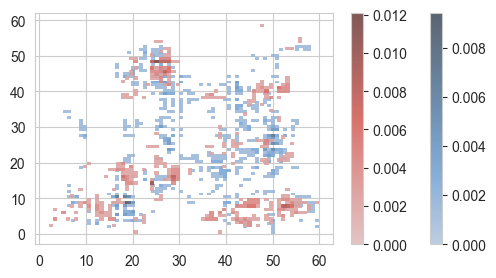

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.histplot(x=np.hstack(x_all_po), y=np.hstack(y_all_po), bins=64, ax=ax, color='#99BADF', alpha=0.9, stat='probability', cbar=True)
sns.histplot(x=np.hstack(x_all), y=np.hstack(y_all), bins=64, ax=ax, color='#DF9E9B', alpha=0.9,  stat='probability', cbar=True)
fig.savefig('SHAP_2Dhist.svg', bbox_inches='tight', dpi=300)

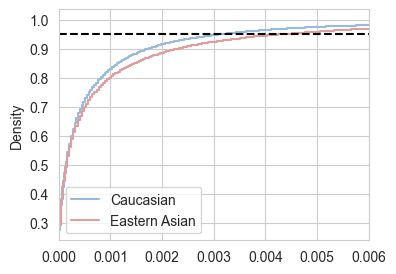

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.histplot(data = np.abs(values_polish[1].flatten()), 
                fill = False, cumulative=True, color='#99BADF',
             element='step', stat='density', ax=ax)
sns.histplot(data = np.abs(values_ea[1].flatten()), 
                fill = False, cumulative=True, color='#DF9E9B',
             element='step', stat='density', ax=ax)
ax.set_xlim(0, 0.006)
ax.legend(['Caucasian', 'Eastern Asian'])
ax.hlines(0.95, 0, 0.0061, ls='--', color='k')
fig.savefig('SHAP_cdf.svg', bbox_inches = 'tight', dpi=300)

<Axes: ylabel='Density'>

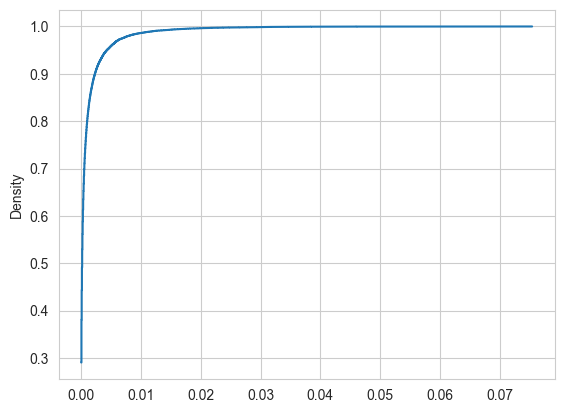

In [53]:
sns.histplot(data = np.abs(values_ea[1].flatten()), 
                fill = False, cumulative=True,
             element='step', stat='density')

(array([29199., 33878., 36159., 37430., 38228., 38782., 39206., 39518.,
        39747., 39953., 40092., 40197., 40296., 40379., 40454., 40529.,
        40587., 40634., 40677., 40706.]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
        0.008 , 0.0085, 0.009 , 0.0095, 0.01  ]),
 <BarContainer object of 20 artists>)

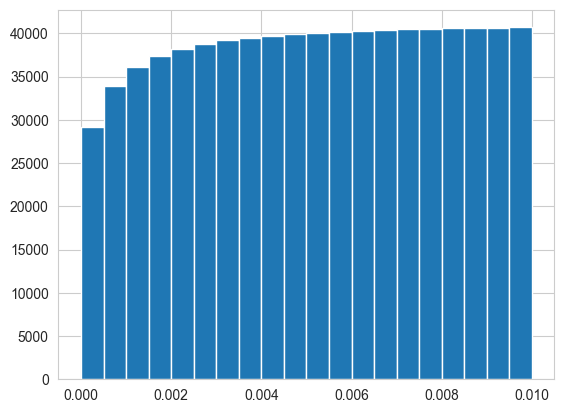

In [32]:
plt.hist(np.abs(values_polish[1].flatten()), range=(0, 0.010), bins=20, cumulative=True)

(array([28197., 32664., 34883., 36235., 37158., 37830., 38305., 38715.,
        39004., 39271., 39501., 39707., 39860., 39957., 40069., 40153.,
        40236., 40296., 40352., 40399.]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
        0.008 , 0.0085, 0.009 , 0.0095, 0.01  ]),
 <BarContainer object of 20 artists>)

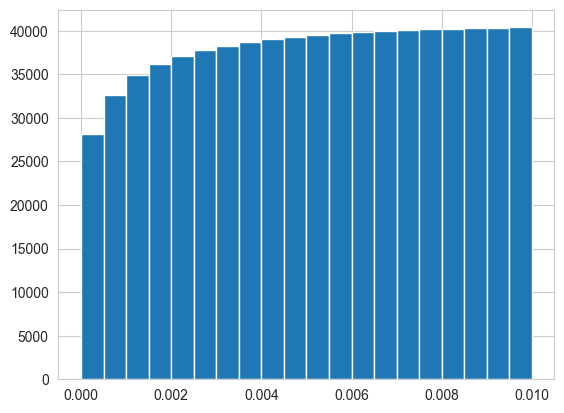

In [31]:
plt.hist(np.abs(values_ea[1].flatten()), range=(0, 0.01), bins=20, cumulative=True)